# Python Machine Learning Demo - Part l

## Overview of the Predictive Modeling Case
A financial services company offers a home equity line of credit to its clients. The
company has extended several thousand lines of credit in the past, and many of these
accepted applicants (approximately 20%) have defaulted on their loans. By using
geographic, demographic, and financial variables, the company wants to build a model
to predict whether an applicant will default.

## Data
After analyzing the data, the company selected a subset of 12 predictor (or input)
variables to model whether each applicant defaulted. The response (or target) variable
(BAD) indicates whether an applicant defaulted on the home equity line of credit.
These variables, along with their model role, measurement level, and description, are
shown in the following table from the **HMEQ** data set.

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| BAD       | Target     | Binary            | 1 = applicant defaulted on loan or delinquent, 0 = applicant paid loan |
| CLAGE     | Input      | Interval          | Age of oldest credit line in months                                    |
| CLNO      | Input      | Interval          | Number of credit lines                                                 |
| DEBTINC   | Input      | Interval          | Debt-to-income ratio                                                   |
| DELINQ    | Input      | Interval          | Number of delinquent credit lines                                      |
| DEROG     | Input      | Interval          | Number of derogatory reports                                           |
| JOB       | Input      | Nominal           | Occupational categories                                                |
| LOAN      | Input      | Interval          | Amount of loan request                                                 |
| MORTDUE   | Input      | Interval          | Amount due on existing mortgage                                        |
| NINQ      | Input      | Interval          | Number of recent credit inquiries                                      |
| REASON    | Input      | Binary            | DebtCon = debt consolidation, HomeImp = home improvement               |
| VALUE     | Input      | Interval          | Value of current property                                              |
| YOJ       | Input      | Interval          | Years at present job                                                   |

# Load Packages

In [1]:
import swat
from swat import *
import pandas as pd
from getpass import *
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

# Connect to CAS

In [2]:
# CAS(hostname,port,username,password)
conn = swat.CAS(hostname='magnus.unx.sas.com', port=5570, protocol='cas', 
        username=input("SSO Username:"), password=getpass("SSO Password:"))


SSO Username:jorgre
SSO Password:········


In [3]:
conn.table.tableinfo(caslib="Public")

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,LENDING_CLUB_CARS,,8863,76,0,utf-8,2020-05-04T15:21:34-04:00,2020-05-04T15:21:34-04:00,2020-05-29T11:28:03-04:00,UTF8,...,0,0,0,LENDING_CLUB_CARS.sashdat,Public,0,saciar,,2020-03-30T10:14:10-04:00,1.901197e+09
1,GOV_GL_ANALYTICS,,6504,84,0,utf-8,2020-05-04T15:58:50-04:00,2020-05-04T15:58:50-04:00,2020-06-02T12:28:52-04:00,UTF8,...,0,0,0,GOV_GL_ANALYTICS.sashdat,Public,0,jemorg,,2019-04-08T10:02:01-04:00,1.870351e+09
2,VENTURA TWITTER DATA,,800,22,0,utf-8,2020-05-04T15:58:50-04:00,2020-05-04T15:58:50-04:00,2020-06-02T12:28:52-04:00,UTF8,...,0,0,0,VENTURA TWITTER DATA.sashdat,Public,0,jemorg,,2019-04-08T14:45:31-04:00,1.870368e+09
3,HOLDING SAFETY CELL TIMES,,30,8,0,utf-8,2020-05-04T15:58:50-04:00,2020-05-04T15:58:50-04:00,2020-06-02T12:28:53-04:00,UTF8,...,0,0,0,HOLDING SAFETY CELL TIMES.sashdat,Public,0,jemorg,,2019-04-09T11:18:11-04:00,1.870442e+09
4,FACEBOOK_SAS,,43,31,0,utf-8,2020-05-04T15:58:50-04:00,2020-05-04T15:58:50-04:00,2020-06-02T12:28:52-04:00,UTF8,...,0,0,0,FACEBOOK_SAS.sashdat,Public,0,jemorg,,2019-03-20T17:13:03-04:00,1.868736e+09
5,CAD,,100001,23,0,utf-8,2020-05-04T15:58:50-04:00,2020-05-04T15:58:50-04:00,2020-06-02T12:28:53-04:00,UTF8,...,0,0,0,CAD.sashdat,Public,0,jemorg,,2019-03-21T12:35:33-04:00,1.868805e+09
6,SFPD_INCIDENT (2),,1376191,27,0,utf-8,2020-05-04T15:58:50-04:00,2020-05-04T15:58:50-04:00,2020-06-02T12:28:53-04:00,UTF8,...,0,0,0,SFPD_INCIDENT (2).sashdat,Public,0,jemorg,,2019-04-04T11:50:59-04:00,1.870012e+09
7,CONTACTDBINFO,,3276,4,0,utf-8,2020-05-04T15:58:55-04:00,2020-05-04T15:58:55-04:00,2020-06-02T12:28:53-04:00,UTF8,...,0,0,0,CONTACTDBINFO.sashdat,Public,0,jemorg,,2019-04-10T11:18:51-04:00,1.870529e+09
8,INCIDENT2,,70305,33,0,utf-8,2020-05-05T11:17:26-04:00,2020-05-05T11:17:26-04:00,2020-06-02T12:28:55-04:00,UTF8,...,0,0,0,INCIDENT2.sashdat,Public,0,jemorg,,2020-03-17T10:08:51-04:00,1.900073e+09
9,LG_FINAL_ABT,,56557,121,0,utf-8,2020-05-05T16:53:52-04:00,2020-05-05T16:53:52-04:00,2020-06-01T15:09:59-04:00,UTF8,...,0,0,0,LG_FINAL_ABT.sashdat,Public,0,ludepa,,2019-03-28T10:37:42-04:00,1.869403e+09


# CAS Session

In [9]:
conn.session.listSessions()

,SessionName,UUID,State,Authentication,Userid
0,py-session-1:Thu May 28 14:59:54 2020,1ed4f173-ae8f-534e-b91b-8fee17c76919,Connected,OAuth/External PAM,jorgre
1,py-session-2:Thu May 28 15:32:06 2020,f2011d1c-8aa6-ad43-bee8-e50c0ac2f14f,Connected,OAuth/External PAM,jorgre
2,py-session-3:Thu May 28 16:09:49 2020,8bf64652-b44f-5546-86d4-6f80bed87bdd,Connected,OAuth/External PAM,jorgre
3,dataExplorer:Thu May 28 16:10:58 2020,586144c3-9e2d-f446-828d-f7ba5948d5e5,Connected,OAuth,jorgre
4,Session:Thu May 28 16:11:18 2020,7ea7ed22-2472-4046-9c12-252cbf59a81c,Connected,OAuth,jorgre
5,SAS Environment Manager-Logging:Thu May 28 16:...,b9216f91-9f78-da48-a86e-c787ae0f829c,Connected,OAuth,jorgre
6,py-session-1:Thu May 28 16:35:52 2020,a225e63a-ead9-f744-9db5-b9706e6defb9,Connected,OAuth/External PAM,jorgre


In [4]:
# Change timeout
mytime = 60*60*12
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[Timeout]

 43200

[locale]

 'en_US'

[number of Connections]

 1

[state]

 'Connected'

+ Elapsed: 0.000273s, sys: 0.000261s, mem: 0.194mb

# Assign Reference to Table

In [18]:
castbl = conn.CASTable('HMEQ', caslib='Public' )


In [19]:
# CASTable is a client side view of data on server
type(castbl)

swat.cas.table.CASTable

In [21]:
castbldf = castbl.to_frame()

In [22]:
# using the to_frame() function, we have now the data brought the data set down locally
type(castbldf)

swat.dataframe.SASDataFrame

# Explore the Data

In [18]:
display(castbl.shape)
list(castbl)

(5960, 13)

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [38]:
display(castbl.mean())
castbl['BAD'].mean()

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64

0.1994966442953

In [20]:
castbl.describe(include=['numeric', 'character'])

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960,5960,5442,5848,5708,5681,5445,5252,5380,5652,5450,5738,4693
unique,2,540,5053,5381,2,6,99,11,14,5314,16,62,4693
top,0,15000,42000,60000,DebtCon,Other,0,0,0,206.967,0,16,203.312
freq,4771,105,11,15,3928,2388,415,4527,4179,7,2531,316,1
mean,0.199497,18608,73760.8,101776,NaN,NaN,8.92227,0.25457,0.449442,179.766,1.18606,21.2961,33.7799
std,0.399656,11207.5,44457.6,57385.8,NaN,NaN,7.57398,0.846047,1.12727,85.8101,1.72867,10.1389,8.60175
min,0,1100,2063,8000,DebtCon,Mgr,0,0,0,0,0,0,0.524499
25%,0,11100,46268,66069,NaN,NaN,3,0,0,115.103,0,15,29.14
50%,0,16300,65019,89235.5,NaN,NaN,7,0,0,173.467,1,20,34.8183
75%,0,23300,91491,119832,NaN,NaN,13,0,0,231.575,2,26,39.0031


# Wrapper

In [10]:
# Head function on the castbl object
display(castbl.head())

# Fetch action on the server data
conn.table.fetch(table=castbl, to=5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# List Action Sets

In [0]:
#http://go.documentation.sas.com/?cdcId=pgmcdc&cdcVersion=8.11&docsetId=allprodsactions&docsetTarget=actionSetsByName.htm&locale=en

In [11]:
conn.builtins.actionSetInfo()

,actionset,label,loaded,extension,version,product_name
0,accessControl,Access Controls,1,tkacon,3.04.000,tkcas
1,accessControl,Access Controls,1,casmeta,3.04.000,tkcas
2,builtins,Builtins,1,tkcasablt,3.04.000,tkcas
3,configuration,Server Properties,1,tkcascfg,3.04.000,tkcas
4,dataPreprocess,Data Preprocess,1,tktrans,3.04.043,crsstat
5,dataStep,DATA Step,1,datastep,3.04.000,tkcas
6,percentile,Percentile,1,tkcasptl,3.04.043,crsstat
7,search,Search,1,casidx,3.04.043,crssearch
8,session,Session Methods,1,tkcsessn,3.04.000,tkcas
9,sessionProp,Session Properties,1,tkcstate,3.04.000,tkcas


# Explore the Data using CAS Actions

In [154]:
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [12]:
conn.simple.correlation(
    table = castbl,
    inputs = ["LOAN","VALUE","BAD"]
)

,Variable,N,Mean,Sum,StdDev,Minimum,Maximum
0,LOAN,5960.0,18607.969799,1.109035e+08,11207.480417,1100.0,89900.0
1,VALUE,5848.0,101776.048741,5.951863e+08,57385.775334,8000.0,855909.0
2,BAD,5960.0,0.199497,1.189000e+03,0.399656,0.0,1.0
,Variable,LOAN,VALUE,BAD,Nobs1,Nobs2,Nobs3
0,LOAN,1.000000,0.335393,-0.075099,5960.0,5848.0,5960.0
1,VALUE,0.335393,1.000000,-0.029954,5848.0,5848.0,5848.0
2,BAD,-0.075099,-0.029954,1.000000,5960.0,5848.0,5960.0


In [42]:
conn.simple.distinct(
    table = castbl,
    inputs = list(castbl)
)

,Column,NDistinct,NMiss,Trunc
0,BAD,2.0,0.0,0.0
1,LOAN,540.0,0.0,0.0
2,MORTDUE,5054.0,518.0,0.0
3,VALUE,5382.0,112.0,0.0
4,REASON,3.0,252.0,0.0
5,JOB,7.0,279.0,0.0
6,YOJ,100.0,515.0,0.0
7,DEROG,12.0,708.0,0.0
8,DELINQ,15.0,580.0,0.0
9,CLAGE,5315.0,308.0,0.0


In [43]:
conn.simple.freq(
    table = castbl,
    inputs = ["BAD","JOB","REASON"]
)

,Column,NumVar,CharVar,FmtVar,Level,Frequency
0,BAD,0.0,,0,1,4771.0
1,BAD,1.0,,1,2,1189.0
2,JOB,NaN,,,1,279.0
3,JOB,NaN,Mgr,Mgr,2,767.0
4,JOB,NaN,Office,Office,3,948.0
5,JOB,NaN,Other,Other,4,2388.0
6,JOB,NaN,ProfExe,ProfExe,5,1276.0
7,JOB,NaN,Sales,Sales,6,109.0
8,JOB,NaN,Self,Self,7,193.0
9,REASON,NaN,,,1,252.0


In [44]:
conn.simple.crossTab(
    table = castbl,
    row = "BAD", col = "JOB"
)

,BAD,Col1,Col2,Col3,Col4,Col5,Col6
0,0,588.0,823.0,1834.0,1064.0,71.0,135.0
1,1,179.0,125.0,554.0,212.0,38.0,58.0


In [49]:
conn.loadActionSet('cardinality')
actions = conn.builtins.help(actionSet='cardinality')

NOTE: Added action set 'cardinality'.
NOTE: Information for action set 'cardinality':
NOTE:    cardinality
NOTE:       summarize - Provides actions for evaluating data cardinality


In [50]:
conn.cardinality.summarize(
    table = castbl,
    cardinality = dict(name='card', replace=True)
)

NOTE: Writing cardinality.
NOTE: status = 0.
NOTE: The Cloud Analytic Services server processed the request in 0.054616 seconds.


+ Elapsed: 0.0563s, user: 0.0368s, sys: 0.0414s, mem: 7.15mb

In [51]:
display(conn.table.fetch(table='card', to=5))
conn.table.recordCount(table='card')

,_VARNAME_,_FMTWIDTH_,_TYPE_,_RLEVEL_,_ORDER_,_MORE_,_CARDINALITY_,_NOBS_,_SUMFREQS_,_NMISS_,...,_SKEWNESS_,_KURTOSIS_,_MFREQ_,_MFREQFOUNDLEVEL_,_MFREQNUM_,_MFREQCHR_,_MFREQCFMT_,_LASTNUM_,_LASTCHR_,_LASTCFMT_
0,BAD,12.0,N,CLASS,ASC,N,2.0,5960.0,5960.0,0.0,...,1.504317,0.263057,4771.0,Y,0.0,,0,1.0,,1
1,LOAN,12.0,N,INTERVAL,ASC,Y,30.0,5960.0,5960.0,0.0,...,2.023781,6.932590,5829.0,N,NaN,,,4700.0,,4700
2,MORTDUE,12.0,N,INTERVAL,ASC,Y,30.0,5960.0,5442.0,518.0,...,1.814481,6.481866,5411.0,N,NaN,,,6124.0,,6124
3,VALUE,12.0,N,INTERVAL,ASC,Y,30.0,5960.0,5848.0,112.0,...,3.053344,24.362805,5818.0,N,NaN,,,20631.0,,20631
4,REASON,7.0,C,CLASS,ASC,N,2.0,5960.0,5708.0,252.0,...,NaN,NaN,3928.0,Y,NaN,DebtCon,DebtCon,NaN,HomeImp,HomeImp


,N
0,13


# Define Cas Table

In [27]:
card = conn.CASTable(name = "card")
display(card.head())
card.shape

,_VARNAME_,_FMTWIDTH_,_TYPE_,_RLEVEL_,_ORDER_,_MORE_,_CARDINALITY_,_NOBS_,_SUMFREQS_,_NMISS_,...,_SKEWNESS_,_KURTOSIS_,_MFREQ_,_MFREQFOUNDLEVEL_,_MFREQNUM_,_MFREQCHR_,_MFREQCFMT_,_LASTNUM_,_LASTCHR_,_LASTCFMT_
0,BAD,12.0,N,CLASS,ASC,N,2.0,5960.0,5960.0,0.0,...,1.504317,0.263057,4771.0,Y,0.0,,0,1.0,,1
1,LOAN,12.0,N,INTERVAL,ASC,Y,30.0,5960.0,5960.0,0.0,...,2.023781,6.932590,5829.0,N,NaN,,,4700.0,,4700
2,MORTDUE,12.0,N,INTERVAL,ASC,Y,30.0,5960.0,5442.0,518.0,...,1.814481,6.481866,5411.0,N,NaN,,,6124.0,,6124
3,VALUE,12.0,N,INTERVAL,ASC,Y,30.0,5960.0,5848.0,112.0,...,3.053344,24.362805,5818.0,N,NaN,,,20631.0,,20631
4,REASON,7.0,C,CLASS,ASC,N,2.0,5960.0,5708.0,252.0,...,NaN,NaN,3928.0,Y,NaN,DebtCon,DebtCon,NaN,HomeImp,HomeImp


(13, 26)

# Visualize Numeric Variables Locally

In [12]:
conn.loadActionSet('sampling')
actions = conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


In [13]:
conn.sampling.srs(
    table   = castbl,
    samppct = 50,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

NOTE: Using SEED=12345 for sampling.


[OutputCasTables]

             casLib   Name Label  Rows  Columns  \
 0  CASUSER(saciar)  mysam        2980       13   
 
                                       casTable  
 0  CASTable('mysam', caslib='CASUSER(saciar)')  

[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   2980

[outputSize]

 {'outputNObs': 2980, 'outputNVars': 13}

+ Elapsed: 0.0458s, user: 0.015s, sys: 0.0536s, mem: 152mb

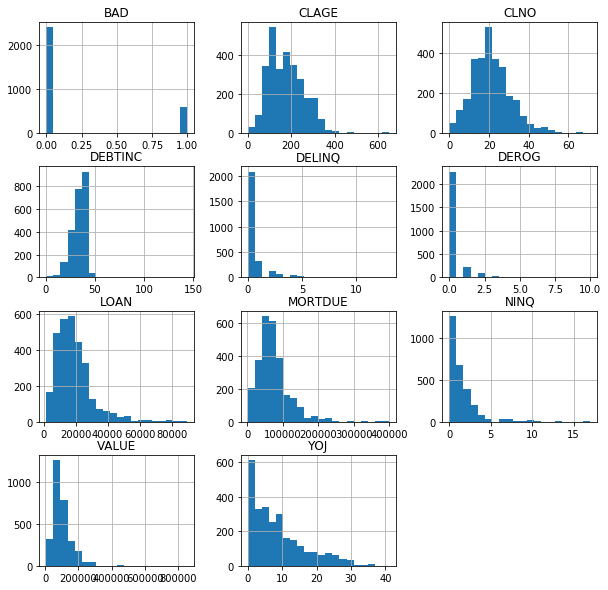

In [14]:
# Create connection object
mysam = conn.CASTable(name = "mysam")

# Bring data locally
df = mysam.to_frame()

# Create histograms of the numeric columns
df.hist(bins=20, figsize=(10,10))
plt.show()

In [15]:
type(df)

swat.dataframe.SASDataFrame

# Check Data for Missing Values

In [16]:
# Create a casDataFrame containing number of missing values for each variable
tbl = castbl.distinct()['Distinct'][['Column', 'NMiss']]
display(type(tbl))
tbl

swat.dataframe.SASDataFrame

,Column,NMiss
0,BAD,0.0
1,LOAN,0.0
2,MORTDUE,518.0
3,VALUE,112.0
4,REASON,252.0
5,JOB,279.0
6,YOJ,515.0
7,DEROG,708.0
8,DELINQ,580.0
9,CLAGE,308.0


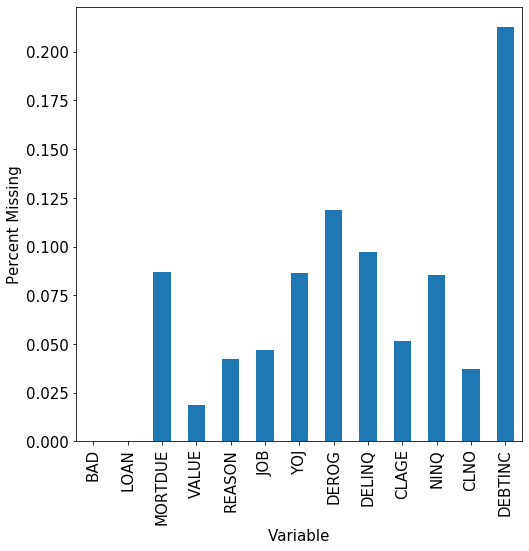

In [58]:
# Plot the percent of missing values locally
nr = castbl.shape[0]
tbl['PctMiss'] = tbl['NMiss']/nr
MissPlot = tbl.plot(x='Column', y='PctMiss', kind='bar', figsize=(8,8), fontsize=15)
MissPlot.set_xlabel('Variable', fontsize=15)
MissPlot.set_ylabel('Percent Missing', fontsize=15)
MissPlot.legend_.remove()
plt.show()

# Impute Missing Values

In [17]:
# Impute missing values with the median for continuous variables and most frequent for nominal variables
conn.dataPreprocess.impute(
    table = castbl,
    methodContinuous = 'MEDIAN',
    methodNominal    = 'MODE',
    inputs           = list(castbl)[1:],
    copyAllVars      = True,
    casOut           = dict(name = 'HMEQ', replace = True)
)

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,LOAN,Median,IMP_LOAN,5960.0,0.0,16300.000000,
1,MORTDUE,Median,IMP_MORTDUE,5442.0,518.0,65019.000000,
2,VALUE,Median,IMP_VALUE,5848.0,112.0,89235.500000,
3,REASON,Mode,IMP_REASON,5708.0,252.0,NaN,DebtCon
4,JOB,Mode,IMP_JOB,5681.0,279.0,NaN,Other
5,YOJ,Median,IMP_YOJ,5445.0,515.0,7.000000,
6,DEROG,Median,IMP_DEROG,5252.0,708.0,0.000000,
7,DELINQ,Median,IMP_DELINQ,5380.0,580.0,0.000000,
8,CLAGE,Median,IMP_CLAGE,5652.0,308.0,173.466667,
9,NINQ,Median,IMP_NINQ,5450.0,510.0,1.000000,


# Create Variable Shortcuts

In [18]:
# Get variable info and types
colinfo = conn.table.columninfo(table='HMEQ')['ColumnInfo']
colinfo

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,BAD,1,double,8,12,0,0
1,LOAN,2,double,8,12,0,0
2,MORTDUE,3,double,8,12,0,0
3,VALUE,4,double,8,12,0,0
4,REASON,5,char,7,7,0,0
5,JOB,6,char,7,7,0,0
6,YOJ,7,double,8,12,0,0
7,DEROG,8,double,8,12,0,0
8,DELINQ,9,double,8,12,0,0
9,CLAGE,10,double,8,12,0,0


In [19]:
# Target variable is the first variable
target = colinfo['Column'][0]

# Get all variables
inputs = list(colinfo['Column'][1:])
nominals = list(colinfo.query('Type=="varchar"')['Column'])

# Get only imputed variables
inputs = [k for k in inputs if 'IMP_' in k]
nominals = [k for k in nominals if 'IMP_' in k]
nominals = [target] + nominals

# Print
display(target)
display(inputs)
display(nominals)

'BAD'

['IMP_CLAGE',
 'IMP_CLNO',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_DEROG',
 'IMP_LOAN',
 'IMP_MORTDUE',
 'IMP_NINQ',
 'IMP_VALUE',
 'IMP_YOJ',
 'IMP_JOB',
 'IMP_REASON']

['BAD']

# Python Machine Learning Demo - Part ll

# Split the Data into Training and Validation

In [20]:
# Partition the data
conn.sampling.srs(
    table   = 'HMEQ',
    samppct = 70,
    seed = 919,
    partind = True,
    output  = dict(casOut = dict(name = indata, replace = True),  copyVars = 'ALL')
)

NOTE: Using SEED=919 for sampling.


[OutputCasTables]

             casLib  Name Label  Rows  Columns  \
 0  CASUSER(saciar)  hmeq        5960       26   
 
                                      casTable  
 0  CASTable('hmeq', caslib='CASUSER(saciar)')  

[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   4172

[outputSize]

 {'outputNObs': 5960, 'outputNVars': 26}

+ Elapsed: 0.0906s, user: 0.0294s, sys: 0.0914s, mem: 152mb

# View the partition

In [21]:
conn.loadActionSet('fedSql')
actions = conn.builtins.help(actionSet='fedSql')

NOTE: Added action set 'fedSql'.
NOTE: Information for action set 'fedSql':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution


In [22]:
# Make sure the partition worked correctly using SQL
counts = conn.fedSql.execDirect(query =
    '''
    SELECT _PartInd_, count(*) 
    FROM hmeq 
    GROUP BY _PartInd_;
    '''
)['Result Set']

display(counts)
counts['Percent'] = counts['COUNT']/sum(counts['COUNT'])
counts

,_PartInd_,COUNT
0,0.0,1788
1,1.0,4172


,_PartInd_,COUNT,Percent
0,0.0,1788,0.3
1,1.0,4172,0.7


In [23]:
# Refresh the castbl object
castbl = conn.CASTable(name='HMEQ')

# Make sure the partition worked correctly using Python code
castbl['_PartInd_'].mean()

0.7

# Dimension Reduction - Var Reduce

In [70]:
conn.loadActionSet('varReduce')
actions = conn.builtins.help(actionSet='varReduce')

NOTE: Added action set 'varReduce'.
NOTE: Information for action set 'varReduce':
NOTE:    varReduce
NOTE:       unsuper - Provides an action for performing unsupervised dimension reduction
NOTE:       super - Provides an action for performing supervised dimension reduction


In [71]:
varReduce_obj = conn.varReduce.super(
    table = castbl,
    target = target,
    inputs = inputs,
    nominals = nominals,
    varexp = 0.90
)

list(varReduce_obj)

['Nobs', 'SelectedEffects', 'SelectionSummary']

In [72]:
varReduce_obj['SelectionSummary']

,Iteration,Variable,Parameter,VarExp,SSE,MSE,AIC,AICC,BIC
0,1,IMP_DELINQ,IMP_DELINQ,0.120065,1.759871,0.000295,0.566918,2.566919,0.566699
1,2,IMP_DEROG,IMP_DEROG,0.165744,1.668511,0.000280,0.514281,2.514283,0.514849
2,3,IMP_CLAGE,IMP_CLAGE,0.190438,1.619124,0.000272,0.484906,2.484909,0.486261
3,4,IMP_DEBTINC,IMP_DEBTINC,0.207067,1.585866,0.000266,0.464822,2.464826,0.466965
4,5,IMP_NINQ,IMP_NINQ,0.215512,1.568976,0.000263,0.454785,2.454791,0.457716
5,6,IMP_LOAN,IMP_LOAN,0.220128,1.559745,0.000262,0.449556,2.449563,0.453273
6,7,IMP_JOB,IMP_JOB Office,0.224244,1.551512,0.000261,0.444935,2.444944,0.449440
7,8,IMP_CLNO,IMP_CLNO,0.227593,1.544814,0.000260,0.441279,2.441291,0.446572
8,9,IMP_JOB,IMP_JOB Sales,0.229777,1.540447,0.000259,0.439119,2.439134,0.445199
9,10,IMP_REASON,IMP_REASON DebtCon,0.232106,1.535788,0.000258,0.436762,2.436779,0.443629


In [73]:
display(varReduce_obj['SelectedEffects'])
list(varReduce_obj['SelectedEffects']['Variable'])

,Number,Variable,Type
0,1,IMP_DELINQ,INTERVAL
1,2,IMP_DEROG,INTERVAL
2,3,IMP_CLAGE,INTERVAL
3,4,IMP_DEBTINC,INTERVAL
4,5,IMP_NINQ,INTERVAL
5,6,IMP_LOAN,INTERVAL
6,7,IMP_JOB,CLASS
7,8,IMP_CLNO,INTERVAL
8,9,IMP_REASON,CLASS
9,10,IMP_MORTDUE,INTERVAL


['IMP_DELINQ',
 'IMP_DEROG',
 'IMP_CLAGE',
 'IMP_DEBTINC',
 'IMP_NINQ',
 'IMP_LOAN',
 'IMP_JOB',
 'IMP_CLNO',
 'IMP_REASON',
 'IMP_MORTDUE',
 'IMP_VALUE',
 'IMP_YOJ']

# Logistic Regression

In [74]:
conn.loadActionSet('regression')
actions = conn.builtins.help(actionSet='regression')

NOTE: Added action set 'regression'.
NOTE: Information for action set 'regression':
NOTE:    regression
NOTE:       glm - Fits linear regression models using the method of least squares
NOTE:       genmod - Fits generalized linear regression models
NOTE:       logistic - Fits logistic regression models
NOTE:       logisticType3 - computes Type 3 or Joint tests that all parameters for an effect are zero.
NOTE:       logisticCode - writes SAS DATA step code for computing predicted values of the fitted model.
NOTE:       genmodScore - creates a table on the server that contains results from scoring observations by using a fitted model.
NOTE:       logisticScore - creates a table on the server that contains results from scoring observations by using a fitted model.
NOTE:       glmScore - creates a table on the server that contains results from scoring observations by using a fitted model.
NOTE:       logisticAssociation - computes indices of rank correlation between predicted probabilities

In [101]:
conn.regression.logistic(
    table    = dict(name = castbl, where = '_PartInd_ = 1'),
    classVars = nominals[1:],
    model = {"depVars":[{"name":"BAD"}], "effects":[{"vars":['IMP_CLAGE', 'IMP_CLNO', 'IMP_DEBTINC','IMP_DELINQ', 'IMP_DEROG', 'IMP_LOAN', 'IMP_MORTDUE', 'IMP_NINQ', 'IMP_VALUE', 'IMP_YOJ']}],
             "dist":"BINOMIAL",
             "link":"LOGIT"},
    store    = dict(name='lr_model',replace=True)
)

NOTE: Convergence criterion (FCONV=1E-7) satisfied.
NOTE: At least one element of the gradient is greater than 1e-3.


,Reason,Status,MaxGradient
0,Convergence criterion (FCONV=1E-7) satisfied.,0,0.001595
,RowId,Description,Value
0,NDESIGNCOLS,Columns in Design,11
1,NEFFECTS,Number of Effects,11
2,MAXEFCOLS,Max Effect Columns,1
3,DESIGNRANK,Rank of Design,11
4,OPTPARM,Parameters in Optimization,11
,RowId,Description,Value
0,M2LL,-2 Log Likelihood,3267.496365
1,AIC,AIC (smaller is better),3289.496365


# Support Vector Machine

In [77]:
conn.loadActionSet('svm')
actions = conn.builtins.help(actionSet='svm')

NOTE: Added action set 'svm'.
NOTE: Information for action set 'svm':
NOTE:    svm
NOTE:       svmTrain - Provides actions for support vector machines


In [78]:
conn.svm.svmTrain(
    table    = dict(name = castbl, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    kernel = 'polynomial', 
    degree = 2,
    savestate = dict(name = 'svm_model', replace = True)
)

NOTE: SVM training is activated.
NOTE: Wrote 10049 bytes to the savestate file svm_model.


[FitStatistics]

 Fit Statistics
 
      Statistic  Training
 0     Accuracy  0.852589
 1        Error  0.147411
 2  Sensitivity  0.989811
 3  Specificity  0.304192

[IterHistory]

 Iteration History
 
     Iteration  Complementarity   Feasibility
 0         1.0     1.002171e+06  2.578424e+06
 1         2.0     1.312729e+03  2.094700e+03
 2         3.0     1.692894e+02  2.094700e-05
 3         4.0     1.786095e+01  2.143825e-06
 4         5.0     2.725896e+00  2.095212e-08
 5         6.0     1.583867e+00  1.017907e-08
 6         7.0     3.347606e-01  1.713739e-09
 7         8.0     1.476522e-01  4.435132e-10
 8         9.0     9.794772e-02  2.418885e-10
 9        10.0     6.618370e-02  1.425157e-10
 10       11.0     4.420835e-02  8.064779e-11
 11       12.0     2.970504e-02  4.397088e-11
 12       13.0     1.962512e-02  2.203471e-11
 13       14.0     1.131033e-02  7.861170e-12
 14       15.0     8.121698e-03  3.945705e-12
 15       16.0     3.566317e-03  7.047973e-13
 16       17.0     1.682876e-03  1.563194e-13
 17       18.0     8.632500e-04  5.329071e-14
 18       19.0     2.091513e-04  4.263256e-14
 19       20.0     3.380797e-05  4.711350e-14
 20       21.0     4.693091e-06  1.527667e-13
 21       22.0     2.457607e-07  2.027545e-13

[Misclassification]

 Misclassification Matrix
 
   Observed  PredEvent  PredNonEvent  TotalTrain
 0        0     3303.0          34.0      3337.0
 1        1      581.0         254.0       835.0
 2    Total     3884.0         288.0      4172.0

[ModelInfo]

 Model Information
 
            RowId                   Descr           Value     NValue
 0       TaskType               Task Type          C_CLAS        NaN
 1         Method  Optimization Technique  Interior Point        NaN
 2          Scale                   Scale             YES        NaN
 3         Kernel         Kernel Function      Polynomial        NaN
 4         degree           Kernel Degree               2   2.000000
 5  PenaltyMethod          Penalty Method               C        NaN
 6              C       Penalty Parameter               1   1.000000
 7        MaxIter      Maximum Iterations              25  25.000000
 8      Tolerance               Tolerance           1e-06   0.000001

[NObs]

 Observations
 
                          Descr       N
 0  Number of Observations Read  4172.0
 1  Number of Observations Used  4172.0

[TrainingResult]

 Training Results
 
           RowId                                Descr        Value
 0            WW             Inner Product of Weights    96.130850
 1          Beta                                 Bias    -1.092666
 2    TotalSlack  Total Slack (Constraint Violations)  1352.564702
 3    LongVector               Norm of Longest Vector     5.068900
 4      nSupport            Number of Support Vectors  1499.000000
 5   nSupportInM  Number of Support Vectors on Margin  1399.000000
 6      MaximumF                            Maximum F     9.875625
 7      MinimumF                            Minimum F    -3.769141
 8      nEffects                    Number of Effects    12.000000
 9       nLevels               Columns in Data Matrix    18.000000
 10   MatrixSize             Columns in Kernel Matrix   190.000000

+ Elapsed: 1.6s, user: 1.17s, sys: 1.52s, mem: 172mb

# Decision Tree

In [79]:
conn.loadActionSet('decisionTree')
actions = conn.builtins.help(actionSet='decisionTree')

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Trains a decision tree
NOTE:       dtreeScore - Scores a table using a decision tree model
NOTE:       dtreeSplit - Splits decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merges decision tree nodes
NOTE:       dtreeCode - Generates DATA step scoring code from a decision tree model
NOTE:       forestTrain - Trains a forest
NOTE:       forestScore - Scores a table using a forest model
NOTE:       forestCode - Generates DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Trains a gradient boosting tree
NOTE:       gbtreeScore - Scores a table using a gradient boosting tree model
NOTE:       gbtreeCode - Generates DATA step scoring code from a gradient boosting tree model
NOTE:       dtreeExportModel - Export the aStore model for a tree model table


In [80]:
conn.decisionTree.dtreeTrain(
    table    = dict(name = castbl, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    casOut   = dict(name = 'dt_model', replace = True)
)

,Descr,Value
0,Number of Tree Nodes,11.000000
1,Max Number of Branches,2.000000
2,Number of Levels,6.000000
3,Number of Leaves,6.000000
4,Number of Bins,20.000000
5,Minimum Size of Leaves,6.000000
6,Maximum Size of Leaves,4067.000000
7,Number of Variables,12.000000
8,Confidence Level for Pruning,0.250000
9,Number of Observations Used,4172.000000


In [0]:
# conn.decisionTree.dtreeTrain(
#    table    = dict(name = indata, where = '_PartInd_ = 1'),
#    target   = target, 
#    inputs   = inputs, 
#    nominals = nominals,
#    casOut   = dict(name = 'dt_model', replace = True)
#)

# Random Forest

In [81]:
conn.decisionTree.forestTrain(
    table    = dict(name = castbl, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    nTree    = 1000,
    casOut   = dict(name = 'rf_model', replace = True)
)

,Descr,Value
0,Number of Trees,1000.000000
1,Number of Selected Variables (M),4.000000
2,Random Number Seed,0.000000
3,Bootstrap Percentage (%),63.212056
4,Number of Bins,20.000000
5,Number of Variables,12.000000
6,Confidence Level for Pruning,0.250000
7,Max Number of Tree Nodes,39.000000
8,Min Number of Tree Nodes,11.000000
9,Max Number of Branches,2.000000


# Gradient Boosting

In [82]:
conn.decisionTree.gbtreeTrain(
    table    = dict(name = castbl, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    nTree    = 1000,
    casOut   = dict(name = 'gbt_model', replace = True)
)

,Descr,Value
0,Number of Trees,1000.0
1,Distribution,2.0
2,Learning Rate,0.1
3,Subsampling Rate,0.5
4,Number of Selected Variables (M),12.0
5,Number of Bins,50.0
6,Number of Variables,12.0
7,Max Number of Tree Nodes,31.0
8,Min Number of Tree Nodes,17.0
9,Max Number of Branches,2.0


# Neural Network

In [83]:
conn.loadActionSet('neuralNet')
actions = conn.builtins.help(actionSet='neuralNet')

NOTE: Added action set 'neuralNet'.
NOTE: Information for action set 'neuralNet':
NOTE:    neuralNet
NOTE:       annTrain - Trains an artificial neural network
NOTE:       annScore - Scores a table using an artificial neural network model
NOTE:       annCode - Generates DATA step scoring code from an artificial neural network model


In [84]:
# Build a neural network model
conn.neuralNet.annTrain(
    table    = dict(name = castbl, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    hiddens = [150],
    nloOpts    = dict(optmlOpt = dict(maxIters = 100, 
                      fConv = 1e-10),
                      lbfgsOpt = dict(numCorrections = 6)),
    casOut   = dict(name = 'nn_model', replace = True)
)

[ConvergenceStatus]

                                            Reason
 0  The optimization exited on maximum iterations.

[ModelInfo]

 Neural Net Model Info for HMEQ
 
                           Descr         Value
 0                         Model    Neural Net
 1   Number of Observations Used          4172
 2   Number of Observations Read          4172
 3      Target/Response Variable           BAD
 4               Number of Nodes           170
 5         Number of Input Nodes            18
 6        Number of Output Nodes             2
 7        Number of Hidden Nodes           150
 8       Number of Hidden Layers             1
 9   Number of Weight Parameters          2850
 10    Number of Bias Parameters           152
 11                 Architecture           MLP
 12        Number of Neural Nets             1
 13              Objective Value  0.0671991966

[OptIterHistory]

     Progress  Objective      Loss  FitError
 0        1.0   4.039115  4.039115  0.474832
 1        2.0   2.261692  2.261692  0.173298
 2        3.0   1.848413  1.848413  0.169463
 3        4.0   1.720089  1.720089  0.187919
 4        5.0   1.616814  1.616814  0.172579
 5        6.0   1.591953  1.591953  0.168744
 6        7.0   1.543915  1.543915  0.160115
 7        8.0   1.523347  1.523347  0.156759
 8        9.0   1.500887  1.500887  0.155801
 9       10.0   1.467211  1.467211  0.149089
 10      11.0   1.432890  1.432890  0.143576
 11      12.0   1.398813  1.398813  0.139262
 12      13.0   1.374470  1.374470  0.129914
 13      14.0   1.348546  1.348546  0.127037
 14      15.0   1.322006  1.322006  0.125839
 15      16.0   1.308627  1.308627  0.128955
 16      17.0   1.296345  1.296345  0.127517
 17      18.0   1.277652  1.277652  0.124640
 18      19.0   1.258455  1.258455  0.122244
 19      20.0   1.212619  1.212619  0.115532
 20      21.0   1.193728  1.193728  0.112416
 21      22.0   1.178933  1.178933  0.109300
 22      23.0   1.171204  1.171204  0.107622
 23      24.0   1.151618  1.151618  0.106184
 24      25.0   1.132781  1.132781  0.104267
 25      26.0   1.098818  1.098818  0.104267
 26      27.0   1.052696  1.052696  0.102349
 27      28.0   1.017848  1.017848  0.095398
 28      29.0   0.995884  0.995884  0.093960
 29      30.0   0.974364  0.974364  0.093480
 ..       ...        ...       ...       ...
 70      71.0   0.330432  0.330432  0.024449
 71      72.0   0.308091  0.308091  0.023011
 72      73.0   0.299806  0.299806  0.026366
 73      74.0   0.286569  0.286569  0.023730
 74      75.0   0.272798  0.272798  0.022291
 75      76.0   0.254618  0.254618  0.021572
 76      77.0   0.248852  0.248852  0.021333
 77      78.0   0.241726  0.241726  0.019655
 78      79.0   0.231467  0.231467  0.017737
 79      80.0   0.214585  0.214585  0.014382
 80      81.0   0.195982  0.195982  0.012943
 81      82.0   0.189291  0.189291  0.014142
 82      83.0   0.173050  0.173050  0.012464
 83      84.0   0.168924  0.168924  0.011745
 84      85.0   0.161588  0.161588  0.011266
 85      86.0   0.158331  0.158331  0.010547
 86      87.0   0.145464  0.145464  0.008869
 87      88.0   0.139793  0.139793  0.008150
 88      89.0   0.133734  0.133734  0.008150
 89      90.0   0.127633  0.127633  0.007430
 90      91.0   0.118175  0.118175  0.006951
 91      92.0   0.111537  0.111537  0.005992
 92      93.0   0.103221  0.103221  0.005992
 93      94.0   0.095635  0.095635  0.004075
 94      95.0   0.092878  0.092878  0.004794
 95      96.0   0.089649  0.089649  0.004314
 96      97.0   0.085471  0.085471  0.004794
 97      98.0   0.081342  0.081342  0.004075
 98      99.0   0.075348  0.075348  0.003835
 99     100.0   0.067199  0.067199  0.002157
 
 [100 rows x 4 columns]

[OutputCasTables]

             casLib      Name  Rows  Columns  \
 0  CASUSER(saciar)  nn_model  2852       15   
 
                                          casTable  
 0  CASTable('nn_model', caslib='CASUSER(saciar)')  

+ Elapsed: 12.7s, user: 17.3s, sys: 6.75s, mem: 42.8mb

# Score the Models

In [85]:
conn.loadActionSet('aStore')
actions = conn.builtins.help(actionSet='aStore')

NOTE: Added action set 'aStore'.
NOTE: Information for action set 'aStore':
NOTE:    astore
NOTE:       download - Downloads a remote store to a local store
NOTE:       upload - Uploads a local store to a remote store
NOTE:       describe - Describes some of the contents of the analytic store
NOTE:       score - Uses an analytic store to score an input table


In [86]:
#Score the support vector machine model
conn.aStore.score(
    table    = dict(name = castbl, where = '_PartInd_ = 0'),
    rstore = "svm_model",
    out = dict(name="svm_scored", replace=True)
)

[OutputCasTables]

             casLib        Name  Rows  Columns  \
 0  CASUSER(saciar)  svm_scored  1788        5   
 
                                            casTable  
 0  CASTable('svm_scored', caslib='CASUSER(saciar)')  

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.000206  0.006265
 1  Creating the State  0.012064  0.366911
 2             Scoring  0.020606  0.626708
 3               Total  0.032880  1.000000

+ Elapsed: 0.0368s, user: 0.0266s, sys: 0.105s, mem: 130mb

In [104]:
#Score the logistic regression model
lr_score_obj = conn.regression.logisticScore(
    table    = dict(name = castbl, where = '_PartInd_ = 0'),
    restore = "lr_model",
    casout = dict(name="lr_scored", replace=True),
    copyVars = target
)

#Score the decision tree model
dt_score_obj = conn.decisionTree.dtreeScore(
    table    = dict(name = castbl, where = '_PartInd_ = 0'),
    model = "dt_model",
    casout = dict(name="dt_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the random forest model
rf_score_obj = conn.decisionTree.forestScore(
    table    = dict(name = castbl, where = '_PartInd_ = 0'),
    model = "rf_model",
    casout = dict(name="rf_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the gradient boosting model
gb_score_obj = conn.decisionTree.gbtreeScore(
    table    = dict(name = castbl, where = '_PartInd_ = 0'),
    model = "gbt_model",
    casout = dict(name="gbt_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the neural network model
nn_score_obj = conn.neuralNet.annScore(
    table    = dict(name = castbl, where = '_PartInd_ = 0'),
    model = "nn_model",
    casout = dict(name="nn_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

In [105]:
#View selected fields from the output object
display(nn_score_obj['OutputCasTables'])
nn_score_obj['ScoreInfo']

,casLib,Name,Rows,Columns,casTable
0,CASUSER(saciar),nn_scored,1788,4,"CASTable('nn_scored', caslib='CASUSER(saciar)')"


,Descr,Value
0,Number of Observations Read,1788
1,Number of Observations Used,1788
2,Misclassification Error (%),8.836689038


# Assess the Models

In [106]:
conn.loadActionSet('percentile')
actions = conn.builtins.help(actionSet='percentile')

NOTE: Added action set 'percentile'.
NOTE: Information for action set 'percentile':
NOTE:    percentile
NOTE:       percentile - Calculate quantiles and percentiles
NOTE:       boxPlot - Calculate quantiles, high and low whiskers, and outliers
NOTE:       assess - Assess and compare models


In [107]:
# Change the name of the prediction variable for logistic regression
conn.dataStep.runCode(code='''
    data lr_scored;
        set lr_scored;
        rename _PRED_ = P_BAD1;
    run;
'''
)

# Add the target variable to the svm scored table
conn.dataStep.runCode(code='''
    data svm_scored;
        merge svm_scored(keep=P_BAD1) lr_scored(keep=BAD);
    run;
'''
)

[InputCasTables]

             casLib        Name  Rows  Columns  \
 0  CASUSER(saciar)  svm_scored  1788        5   
 1  CASUSER(saciar)   lr_scored  1788        2   
 
                                            casTable  
 0  CASTable('svm_scored', caslib='CASUSER(saciar)')  
 1   CASTable('lr_scored', caslib='CASUSER(saciar)')  

[OutputCasTables]

             casLib        Name  Rows  Columns  Append  \
 0  CASUSER(saciar)  svm_scored  1788        2     NaN   
 
                                            casTable  
 0  CASTable('svm_scored', caslib='CASUSER(saciar)')  

+ Elapsed: 0.186s, user: 0.17s, sys: 0.419s, mem: 41.9mb

In [108]:
# Create prediction variable name
assess_input = 'P_' + target + '1'

# Assess the logistic regression model
lr_assess_obj = conn.percentile.assess(
   table = 'lr_scored',
   inputs = assess_input,
   casout = dict(name="lr_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the support vector machine model
svm_assess_obj = conn.percentile.assess(
   table = 'svm_scored',
   inputs = assess_input,
   casout = dict(name="svm_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the decision tree model
dt_assess_obj = conn.percentile.assess(
   table = "dt_scored",
   inputs = assess_input,
   casout = dict(name="dt_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the random forest model
rf_assess_obj = conn.percentile.assess(
   table = "rf_scored",
   inputs = assess_input,
   casout = dict(name="rf_assess",replace=True),
   response = target,
   event = "1"
)

#Assess the gradient boosting model
gb_assess_obj = conn.percentile.assess(
   table = "gbt_scored",
   inputs = assess_input,
   casout = dict(name="gbt_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the neural network model
nn_assess_obj = conn.percentile.assess(
   table = "nn_scored",
   inputs = assess_input,
   casout = dict(name="nn_assess",replace=True),
   response = target,
   event = "1"
)

In [109]:
nn_assess_obj['OutputCasTables']

,casLib,Name,Rows,Columns,casTable
0,CASUSER(saciar),nn_assess,20,21,"CASTable('nn_assess', caslib='CASUSER(saciar)')"
1,CASUSER(saciar),nn_assess_ROC,100,21,"CASTable('nn_assess_ROC', caslib='CASUSER(saci..."


# View the Assess Action Output

In [110]:
display(conn.table.fetch(table='nn_assess', to=5))
conn.table.fetch(table='nn_assess_ROC', to=5)

,_Column_,_Event_,_Depth_,_Value_,_NObs_,_NEvents_,_NEventsBest_,_Resp_,_RespBest_,_Lift_,...,_CumResp_,_CumRespBest_,_CumLift_,_CumLiftBest_,_PctResp_,_PctRespBest_,_CumPctResp_,_CumPctRespBest_,_Gain_,_GainBest_
0,P_BAD1,1,5.0,0.999944,90.0,85.0,90.0,24.011299,25.423729,4.802260,...,24.011299,25.423729,4.802260,5.084746,94.444444,100.000000,94.444444,100.000000,3.802260,4.084746
1,P_BAD1,1,10.0,0.991419,90.0,80.0,90.0,22.598870,25.423729,4.519774,...,46.610169,50.847458,4.661017,5.084746,88.888889,100.000000,91.666667,100.000000,3.661017,4.084746
2,P_BAD1,1,15.0,0.635074,90.0,68.0,90.0,19.209040,25.423729,3.841808,...,65.819209,76.271186,4.387947,5.084746,75.555556,100.000000,86.296296,100.000000,3.387947,4.084746
3,P_BAD1,1,20.0,0.136068,90.0,40.0,84.0,11.299435,23.728814,2.259887,...,77.118644,100.000000,3.855932,5.000000,44.444444,93.333333,75.833333,98.333333,2.855932,4.000000
4,P_BAD1,1,25.0,0.025670,90.0,22.0,0.0,6.214689,0.000000,1.242938,...,83.333333,100.000000,3.333333,4.000000,24.444444,0.000000,65.555556,78.666667,2.333333,3.000000


,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,...,_FHALF_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_
0,P_BAD1,1,0.00,354.0,1434.0,0.0,0.0,1.000000,0.000000,0.0,...,0.235811,1.000000,0.197987,0.802013,0.330532,0.899068,0.798137,0.916831,0.253611,0.802013
1,P_BAD1,1,0.01,303.0,208.0,51.0,1226.0,0.855932,0.854951,0.0,...,0.631776,0.145049,0.855145,0.407045,0.700578,0.899068,0.798137,0.916831,0.253611,0.144855
2,P_BAD1,1,0.02,296.0,167.0,58.0,1267.0,0.836158,0.883543,0.0,...,0.670898,0.116457,0.874161,0.360691,0.724602,0.899068,0.798137,0.916831,0.253611,0.125839
3,P_BAD1,1,0.03,292.0,147.0,62.0,1287.0,0.824859,0.897490,0.0,...,0.691943,0.102510,0.883110,0.334852,0.736444,0.899068,0.798137,0.916831,0.253611,0.116890
4,P_BAD1,1,0.04,289.0,130.0,65.0,1304.0,0.816384,0.909344,0.0,...,0.711823,0.090656,0.890940,0.310263,0.747736,0.899068,0.798137,0.916831,0.253611,0.109060


# Bring Results to the Client

In [111]:
# Create table objects from the assess output, 
# bring data to the client, 
# and add new variable to data frame indicating model name

lr_assess_ROC = conn.CASTable(name = "lr_assess_ROC")
lr_assess_ROC = lr_assess_ROC.to_frame()
lr_assess_ROC['Model'] = 'Logistic Regression'

svm_assess_ROC = conn.CASTable(name = "svm_assess_ROC")
svm_assess_ROC = svm_assess_ROC.to_frame()
svm_assess_ROC['Model'] = 'Support Vector Machine'

dt_assess_ROC = conn.CASTable(name = "dt_assess_ROC")
dt_assess_ROC = dt_assess_ROC.to_frame()
dt_assess_ROC['Model']= 'Decision Tree'

rf_assess_ROC = conn.CASTable(name = "rf_assess_ROC")
rf_assess_ROC = rf_assess_ROC.to_frame()
rf_assess_ROC['Model'] = 'Random Forest'

gbt_assess_ROC = conn.CASTable(name = "gbt_assess_ROC")
gbt_assess_ROC = gbt_assess_ROC.to_frame()
gbt_assess_ROC['Model'] = 'Gradient Boosting'

nn_assess_ROC = conn.CASTable(name = "nn_assess_ROC")
nn_assess_ROC = nn_assess_ROC.to_frame()
nn_assess_ROC['Model'] = 'Neural Network'

# Compare Confusion Matrix

In [112]:
df_assess = pd.DataFrame()
df_assess = pd.concat([lr_assess_ROC,svm_assess_ROC,dt_assess_ROC,rf_assess_ROC,gbt_assess_ROC,nn_assess_ROC])
cutoff_index = df_assess['_Cutoff_']==0.5
compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

,Model,_TP_,_FP_,_FN_,_TN_
0,Logistic Regression,99.0,31.0,255.0,1403.0
1,Support Vector Machine,90.0,14.0,264.0,1420.0
2,Decision Tree,25.0,0.0,329.0,1434.0
3,Random Forest,21.0,0.0,333.0,1434.0
4,Gradient Boosting,252.0,34.0,102.0,1400.0
5,Neural Network,242.0,46.0,112.0,1388.0


# Compare Misclassification

In [113]:
compare['Misclassification'] = 1-compare['_ACC_']
miss = compare[compare['_Cutoff_']==0.5][['Model','Misclassification']]
miss.sort_values('Misclassification')

,Model,Misclassification
4,Gradient Boosting,0.076063
5,Neural Network,0.088367
1,Support Vector Machine,0.155481
0,Logistic Regression,0.159955
2,Decision Tree,0.184004
3,Random Forest,0.186242


# Compare ROC Curves

['Logistic Regression',
 'Support Vector Machine',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'Neural Network']

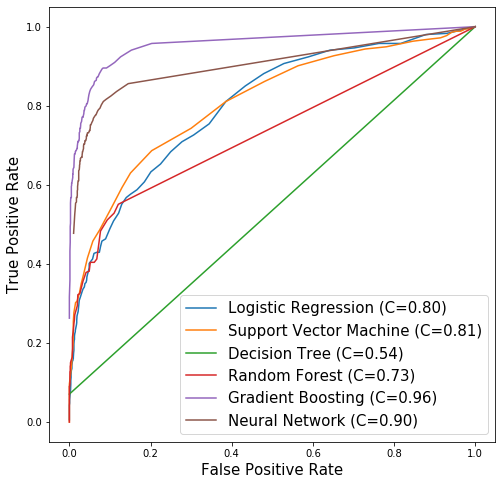

In [114]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add each curve to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# Compare Lift Curves

In [115]:
lr_assess_lift = conn.CASTable(name = "lr_assess")
lr_assess_lift = lr_assess_lift.to_frame()
lr_assess_lift['Model'] = 'Logistic Regression'

svm_assess_lift = conn.CASTable(name = "svm_assess")
svm_assess_lift = svm_assess_lift.to_frame()
svm_assess_lift['Model'] = 'Support Vector Machine'

dt_assess_lift = conn.CASTable(name = "dt_assess")
dt_assess_lift = dt_assess_lift.to_frame()
dt_assess_lift['Model']= 'Decision Tree'

rf_assess_lift = conn.CASTable(name = "rf_assess")
rf_assess_lift = rf_assess_lift.to_frame()
rf_assess_lift['Model'] = 'Random Forest'

gbt_assess_lift = conn.CASTable(name = "gbt_assess")
gbt_assess_lift = gbt_assess_lift.to_frame()
gbt_assess_lift['Model'] = 'Gradient Boosting'

nn_assess_lift = conn.CASTable(name = "nn_assess")
nn_assess_lift = nn_assess_lift.to_frame()
nn_assess_lift['Model'] = 'Neural Network'

df_assess = pd.DataFrame()
df_assess = pd.concat([lr_assess_lift,svm_assess_lift,dt_assess_lift,rf_assess_lift,gbt_assess_lift,nn_assess_lift])

['Logistic Regression',
 'Support Vector Machine',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'Neural Network']

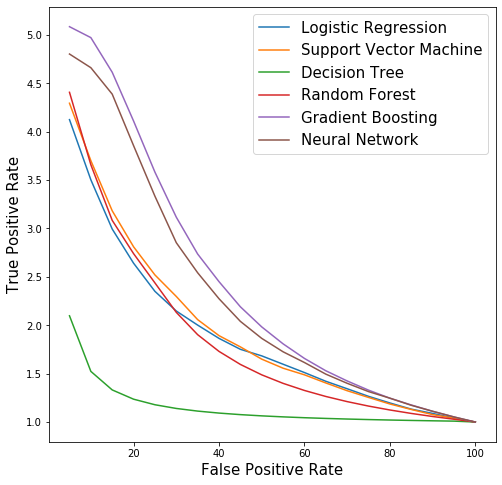

In [116]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_Depth_'],tmp['_CumLift_'], label=X)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Fit an Scikitlearn GB Model in Python Locally

In [156]:
# Create sample to bring to the client
conn.sampling.srs(
    table   = castbl,
    samppct = 75,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

NOTE: Using SEED=12345 for sampling.


[OutputCasTables]

             casLib   Name Label  Rows  Columns  \
 0  CASUSER(saciar)  mysam        4470       13   
 
                                       casTable  
 0  CASTable('mysam', caslib='CASUSER(saciar)')  

[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   4470

[outputSize]

 {'outputNObs': 4470, 'outputNVars': 13}

+ Elapsed: 0.0583s, user: 0.0166s, sys: 0.0671s, mem: 153mb

In [163]:
# Bring data locally
mysam = conn.CASTable(name = "mysam")
df = mysam.to_frame()
# df = df[[target]+inputs+['_PartInd_']]
# df = pd.DataFrame(df)


In [164]:
type(df)

swat.dataframe.SASDataFrame

In [137]:
# Create dummy variables
df = df.drop(['IMP_JOB', 'IMP_REASON'], axis=1)


In [138]:

# Split into training and validation
train = df[df['_PartInd_']==1]
valid = df[df['_PartInd_']==0]

# Split target and inputs
x_train = train.drop(target, axis=1)
x_valid = valid.drop(target, axis=1)
y_train = train[target]
y_valid = valid[target]

# Build python gradient boosting model with scikit-learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



In [139]:
# Fit the model locally
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [140]:
x_train.head()

,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,_PartInd_
5,216.933333,12.0,34.818262,2.0,0.0,2000.0,32700.0,1.0,46740.0,3.0,1.0
7,86.066667,25.0,34.818262,0.0,0.0,2000.0,45000.0,2.0,55000.0,3.0,1.0
8,123.000000,16.0,34.818262,1.0,0.0,2100.0,71000.0,0.0,83850.0,8.0,1.0
9,300.866667,8.0,34.818262,1.0,0.0,2200.0,24280.0,0.0,34687.0,7.0,1.0
10,122.900000,22.0,34.818262,6.0,2.0,2200.0,90957.0,1.0,102600.0,7.0,1.0


# Score and Assess Sklearn Gradient Boosting on Validation Data

In [141]:
gb_score = gb.predict(x_valid)
gb_misclassification = 1 - accuracy_score(y_valid, gb_score)
pymiss = pd.DataFrame({'Model':'Python - Gradient Boosting', 'Misclassification':gb_misclassification}, index=[0])
pymiss

,Model,Misclassification
0,Python - Gradient Boosting,0.10177


# Final Assessment with CAS and Python Models

In [142]:
# Combine the assessments and order by most accurate on validation data
miss_all = pd.DataFrame(miss).append(pymiss, ignore_index=True)
miss_all.sort_values('Misclassification').reset_index(drop=True)

,Model,Misclassification
0,Gradient Boosting,0.076063
1,Neural Network,0.088367
2,Python - Gradient Boosting,0.101770
3,Support Vector Machine,0.155481
4,Logistic Regression,0.159955
5,Decision Tree,0.184004
6,Random Forest,0.186242


# View All Data Tables in Current Session

In [143]:
conn.table.tableInfo()['TableInfo'][['Name','Rows','Columns']]

,Name,Rows,Columns
0,CARD,13,26
1,HMEQ,5960,26
2,SVM_MODEL,1,2
3,DT_MODEL,11,27
4,RF_MODEL,15820,39
5,GBT_MODEL,29704,30
6,NN_MODEL,2852,15
7,LR_MODEL,1,2
8,DT_SCORED,1788,13
9,RF_SCORED,1788,6


# Add caslib to specify a data source

In [145]:
# Show the current location
conn.table.caslibInfo(active=False, caslib="casuser(saciar)")

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(saciar),PATH,Personal File System Caslib,/home/saciar/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0


In [76]:
# Add CAS library named mycl on the server
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", 
                    dataSource="PATH", description="Personal File Save Location", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,Personal File Save Location,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


In [77]:
# Show the current location
conn.table.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(student),PATH,Personal File System Caslib,/home/student/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0
1,CPSAppData,PATH,Stores data for the planning service.,/opt/sas/viya/config/data/cas/default/cpsAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
2,Formats,PATH,Stores user defined formats.,/opt/sas/viya/config/data/cas/default/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
3,ModelPerformanceData,PATH,Library for Model Management performance objects.,/opt/sas/viya/config/data/cas/default/modelMon...,,0.0,0.0,0.0,0.0,0.0,0.0
4,Models,PATH,Stores models created by Visual Analytics for ...,/opt/sas/viya/config/data/cas/default/models/,,0.0,0.0,0.0,0.0,0.0,0.0
5,Public,PATH,"Shared and writeable caslib, accessible to all...",/opt/sas/viya/config/data/cas/default/public/,,0.0,0.0,0.0,0.0,0.0,0.0
6,Samples,PATH,"Stores sample data, supplied by SAS.",/opt/sas/viya/config/data/cas/default/samples/,,0.0,0.0,0.0,0.0,0.0,0.0
7,mycl,PATH,Personal File Save Location,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


# Save the Best Model

In [78]:
conn.table.save(caslib = 'mycl', table = dict(name = 'gbt_model'), name = 'best_model_gbt', replace = True)

NOTE: Cloud Analytic Services saved the file best_model_gbt.sashdat in caslib mycl.


[caslib]

 'mycl'

[name]

 'best_model_gbt.sashdat'

+ Elapsed: 0.181s, user: 0.00136s, sys: 0.0172s, mem: 16.5mb

In [79]:
# Save the Model Attributes
conn.table.attribute(caslib = 'CASUSER(student)', table = 'gbt_model_attr', name = 'gbt_model', task='convert')
conn.table.save(caslib = 'mycl', table = 'gbt_model_attr', name = 'attr', replace = True)

NOTE: Cloud Analytic Services saved the file attr.sashdat in caslib mycl.


[caslib]

 'mycl'

[name]

 'attr.sashdat'

+ Elapsed: 0.00658s, sys: 0.00217s, mem: 16.4mb

# Drop a CASLIB

In [80]:
conn.table.dropCaslib(caslib="mycl")

NOTE: Cloud Analytic Services removed the caslib 'mycl'.


+ Elapsed: 0.000446s, user: 0.000411s, sys: 2.2e-05s, mem: 0.266mb

# Promote Data Table to Global Scope * If interested

In [0]:
conn.table.promote(caslib="casuser(saciar)", name=castbl)
conn.table.tableInfo()

# End the Session

In [14]:
conn.session.endSession()

+ Elapsed: 0.000877s, user: 0.000236s, sys: 0.000482s, mem: 0.195mb

# Python Machine Learning Demo - Part lll

![title](sas_viya_logo.png)